- **SparkConf** 사용자가 재정의해서 쓸 수 있는 설정 옵션들에 대한 키와 값을 갖고 있는 객체
- **SparkContext** Spark 클러스터와 연결시켜주는 객체
    - Spark 모든 기능에 접근할 수 있는 시작점
    - Spark는 분산환경에서 동작하기 때문에 Driver Program을 구동시키기 위해 SparkContext가 필요
    - SparkContext는 프로그램당 하나만 만들 수 있고 사용 후에는 종료
- SparkContext 초기화
    - SparkContext 객체는 내부에 자바로 동작하는 Py4J의 SparkContext와 연결
    - 이 덕분에 파이썬으로 코딩하면서도 자바 위에서 동작하는 프로그램 작성 가능
    - RDD를 만들 수 있음
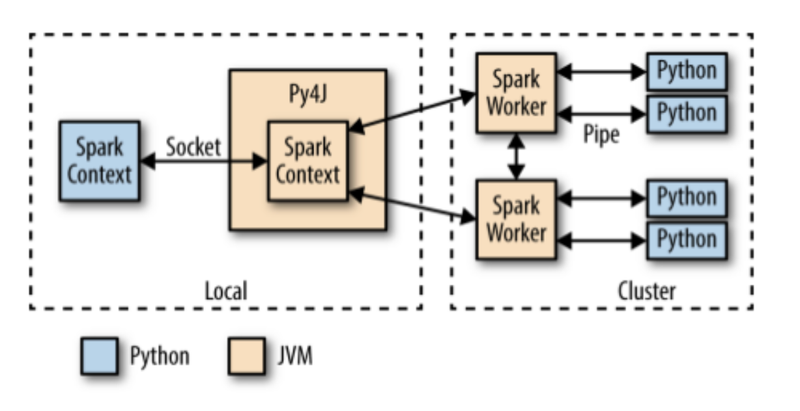

In [1]:
import pandas as pd
from pyspark import SparkConf, SparkContext

In [2]:
conf = SparkConf().setMaster('local').setAppName('uber-date-trips')
sc = SparkContext(conf=conf)

In [3]:
lines = sc.textFile(r'C:\Users\kang\Desktop\git-study-spark\data\fhvhv_tripdata_2020-03.csv')

In [4]:
lines.take(3)

['hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag',
 'HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,',
 'HV0005,B02510,2020-03-01 00:28:05,2020-03-01 00:38:57,168,119,']

In [5]:
header = lines.first()

In [6]:
filtered_lines = lines.filter(lambda row: row != header)

In [7]:
dates = filtered_lines.map(lambda x: x.split(',')[2].split(' ')[0])

In [8]:
dates.take(3)

['2020-03-01', '2020-03-01', '2020-03-01']

### CountByValue

In [9]:
result = dates.countByValue()

result는 RDD가 아닌 Python 객체

In [10]:
result

defaultdict(int,
            {'2020-03-01': 784246,
             '2020-03-02': 648986,
             '2020-03-03': 697880,
             '2020-03-04': 707879,
             '2020-03-05': 731165,
             '2020-03-06': 872012,
             '2020-03-07': 886071,
             '2020-03-08': 731222,
             '2020-03-09': 628940,
             '2020-03-10': 626474,
             '2020-03-11': 628601,
             '2020-03-12': 643257,
             '2020-03-13': 660914,
             '2020-03-14': 569397,
             '2020-03-15': 448125,
             '2020-03-16': 391518,
             '2020-03-17': 312298,
             '2020-03-18': 269232,
             '2020-03-19': 252773,
             '2020-03-20': 261900,
             '2020-03-21': 215745,
             '2020-03-22': 162165,
             '2020-03-23': 162392,
             '2020-03-24': 141686,
             '2020-03-25': 141088,
             '2020-03-26': 141607,
             '2020-03-27': 159339,
             '2020-03-28': 138456,
   

In [11]:
pdResult = pd.Series(result, name='trips')

<AxesSubplot:>

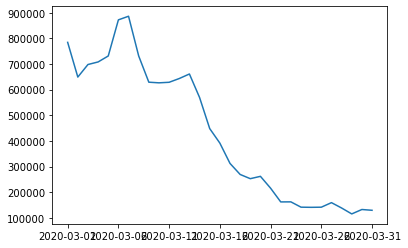

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

pdResult.plot()